# ANÁLISE E PREVISÃO DO CHURN DE CLIENTES EM UM BANCO

**POR LUCAS FONSECA MÜLLER**

### 1. INTRODUÇÃO 

O presente estudo, inspirado no trabalho de *Keldine Malit*, intitulado *Preventing bank customer churn*, foi desenvolvido para fins didáticos, buscando a assimilação dos conceitos básicos de análise exploratória e machine learning com python. Visando a análise do dataset, que contem um portfólio de clientes de um determinado banco, objetiva-se a busca de um modelo ótimo que indique, antecipadamente, quais clientes possuem mais chances de deixar de consumir os produtos bancários, para assim definir uma melhor estratégia para a retenção dos mesmos.  

Sendo assim, essa análise contem os seguintes objetivos:

<ol>
    <li> Identificar e visualizar quais os atributos que mais influenciam na perda de clientes;</li>
    <li> Construir um modelo preditivo que fará a análise das variáveis e definirá a probabilidade de um cliente deixar de utilizar os serviços bancários. Esse modelo auxiliará a empresa a focar os seus esforços na retenção dos clientes com maiores chances de perda.
</ol>

#### 1.1. Dicionário de variáveis:

<ul>
    <li>RowNumber: Corresponde ao número de linhas do dataset; </li>
    <li>CustomerId: Contem valores aleatórios e únicos para identificação do cliente; </li>
    <li>Surname: Sobrenome do Cliente; </li>
    <li>CreditScore: Pontuação de crédito do cliente; </li>
    <li>Geography: Localização do Cliente; </li>
    <li>Gender: Gênero do Cliente; </li>
    <li>Age: Idade do Cliente; </li>
    <li>Tenure: Tempo de fidelidade do Cliente; </li>
    <li>Balance: Saldo Bancário do Cliente; </li>
    <li>NumofProducts:Qtde. de produtos consumidos pelo Cliente no banco; </li>
    <li>HasCrCard: Possui cartão de crédito?; </li>
    <li>IsActiveMember: É cliente ativo?; </li>
    <li>EstimatedSalary: Salário estimado do Cliente; </li>
    <li>Exited: Cliente deixou o banco?; </li>
</ul>

### 2. SUMARIZAÇÃO E PREPARAÇÃO DO DATASET 

Nessa etapa, será realizada a exploração do conjunto de dados, visando:
    
<ol>
    <li> A descoberta das dimensões do dataset e os seus respectivos significados;</li>
    <li> A preparação destes dados para os processos de exploração e construção dos modelos preditivos, citados na primeira seção do projeto. </li>
</ol>

In [2]:
# Bibliotecas a serem utilizadas no dataset:

# Em sua preparação:
import numpy as np 
import pandas as pd 

# Em sua visualização:
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns 
pd.options.display.max_rows = None 
pd.options.display.max_columns = None 

In [3]:
# Lendo o conjunto de dados:
df = pd.read_csv('https://raw.githubusercontent.com/lucas-sls/Prevendo_churn_clientes/main/DATA/Churn_Modelling.csv')
df.shape

(10000, 14)

Conforme resultado obtido acima, pode-se concluir que o conjunto de dados possui 10000 registros explicados por cerca de 14 atributos. Essa noção inicial do dimensionamento do dataset é essencial para a etapa de manipulação dos dados que será realizada antes dos objetivos principais desse estudo: a análise exploratória e a construção dos modelos de predição. 

In [4]:
# Listando as features do dataset e os valores faltantes
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Verificando as colunas do conjunto de dados, pode-se afirmar que não há valores faltantes.

In [6]:
# Contagem de valores distintos para cada variável
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

Conforme a relação acima, percebe-se que as variáveis *Rownumber* e *CustomerId* são atributos particulares de clientes e não influenciam no restante das variáveis. Ao encontro dessa lógica, pode-se citar também a variável *Surname*, sendo essas três variáveis descartáveis para a análise.

In [7]:
# Apagando colunas descritas acima:
df = df.drop(["RowNumber", "CustomerId", "Surname"], axis= 1)

# Verificando as primeiras linhas do dataset após a exclusão:
df.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Uma vez feitas as modificações, podemos debater algumas questões que ficaram vagas:

<ol>
    <li>Os dados aparentam ser uma fotografia de algum ponto no tempo, como podemos perceber pelo saldo demonstrado para uma determinada data não citada. Sendo assim, podemos fazer alguns questionamentos, como: Que data seria essa e qual seria a sua importância na análise e construção do modelo de previsão? Seria possível obter saldos de outras datas, para termos um parâmetro de comparação?</li>
    <li>Ainda existem clientes que possuem saldo no banco, mesmo após a sua saída. Qual o significado disso? Será que realmente eles deixaram o banco, ou apenas pararam de consumir determinado produto que lhe foi oferecido pela instituição?</li>
    <li>O que realmente significa ser um membro ativo? Existem diferentes níveis para se mensurar essa variável? Será que não seria melhor a realização desse nivelamento por meio da quantidade de operações de créditos e débitos em conta?</li>
    <li>Além da quantidade de produtos bancários utilizados por cada cliente, um detalhamento dos mesmos seria de grande valia para a construção de um modelo de predição.</li>
</ol>

Dentro do contexto analisado e com os dados disponíveis, ainda é possível a análise do dataset, assim como a construção de modelos preditivos. No entanto, teremos um menor número de insights e uma potencial diminuição na eficácia de nosso modelo, uma vez que há lacunas que faltam ser explicadas.

In [8]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

Observando os tipos de variáveis presentes em nosso dataset original, percebemos que 7 das 11 totais são do tipo inteiro. Além dos inteiros, temos 2 strings e 2 do tipo float (com casas decimais).

### 3. ANÁLISE EXPLORATÓRIA DOS DADOS

Dentro dessa seção, buscaremos um compreensão geral do comportamento dos dados, assim como a mensuração da relação de todas as variáveis com a nossa variável-alvo para a resolução do problema de pesquisa (*Exited*).

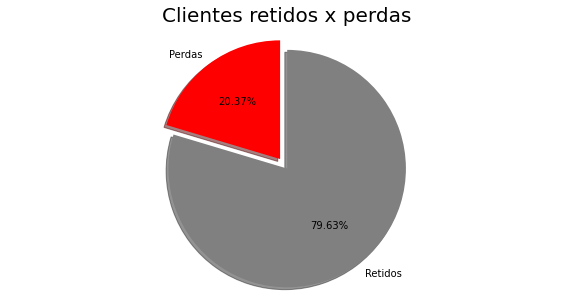

In [9]:
legendas = 'Perdas', 'Retidos'
frame = [df.Exited[df['Exited'] == 1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 5))
ax1.pie(frame, explode=explode, labels=legendas, autopct='%1.2f%%',
        shadow=True, startangle=90, colors=['red','gray'])
ax1.axis('equal')
plt.title("Clientes retidos x perdas", size = 20)
plt.show()

Sendo assim, percebemos que aproximadamente 1 a cada 5 clientes deixam de consumir os produtos da instituição bancária. Nesse sentido, objetiva-se a busca de um modelo de machine learning que preveja com máxima precisão esses 20%, uma vez que esse número é pequeno, e a proposta do banco é focar justamente na retenção desse grupo, e não na previsão da quantidade de clientes ativos.

<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

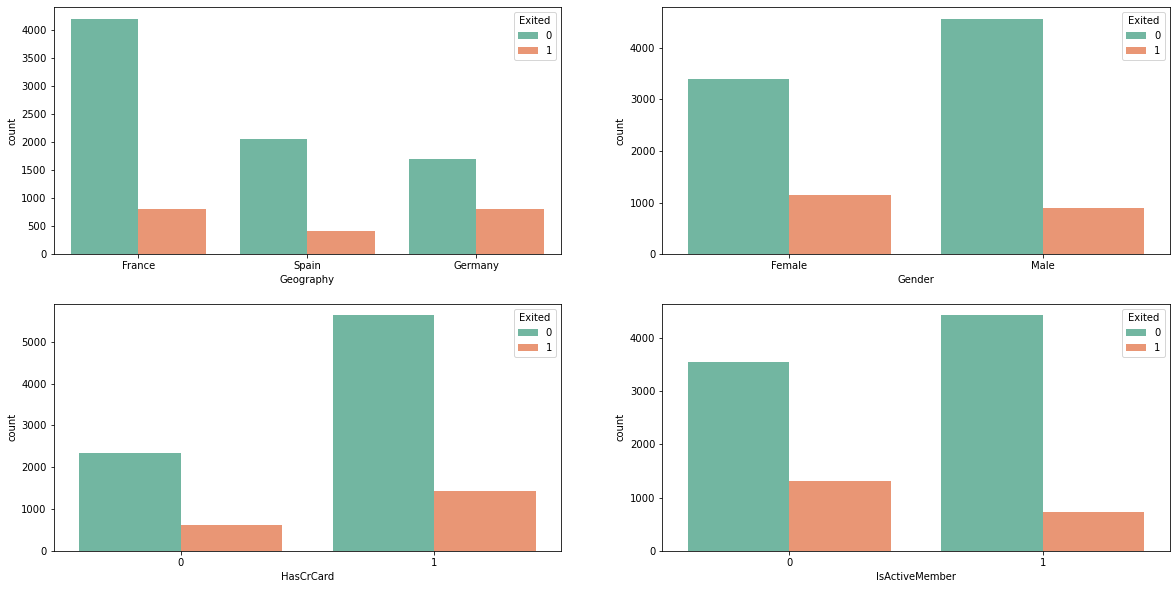

In [10]:
# O próximo passo é revisarmos a relação da variável 'Status' com as demais variáveis categóricas

fig , axarr = plt.subplots(2, 2, figsize=(20, 10))
palette = 'Set2' 
sns.countplot(x='Geography', hue = 'Exited',data = df, ax=axarr[0][0], palette=palette)
sns.countplot(x='Gender', hue = 'Exited',data = df, ax=axarr[0][1], palette=palette)
sns.countplot(x='HasCrCard', hue = 'Exited',data = df, ax=axarr[1][0], palette=palette)
sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=axarr[1][1], palette=palette)

Observando os gáficos de barras, podemos inferir que:

* Nos países onde o banco possui um menor número de clientes, há uma maior taxa de Churn. É um fato a ser destacado, pois provavelmente temos aí um acúmulo de atenção em seus maiores polos, consequentemente havendo uma certa desatenção com as áreas de menor clientela. Um dos motivos poderia ser o alto custo atrelado ao baixo poder de investimento nessa cadeia logística;

* Há um maior percentual de evasão do público feminino, em relação ao masculino;

* Existe um maior churn entre os clientes que utilizam cartão de crédito em relação aos que não utilizam. Como temos um maior público que utiliza este produto bancário, tal fato tende a ser apenas uma coincidência;

* Sem maiores surpresas, vemos que as evasões de clientes concentram-se mais entre os membros inativos. No entanto, algo que surpreende é a alta taxa de membros inativos em relaçao ao portfólio de clientes. Nesse caso, uma sugestão à instituição é a adoção de um programa para tornar esses clientes ativos, e assim, consequentemente, otimizar o desempenho da empresa.


<AxesSubplot:xlabel='Exited', ylabel='EstimatedSalary'>

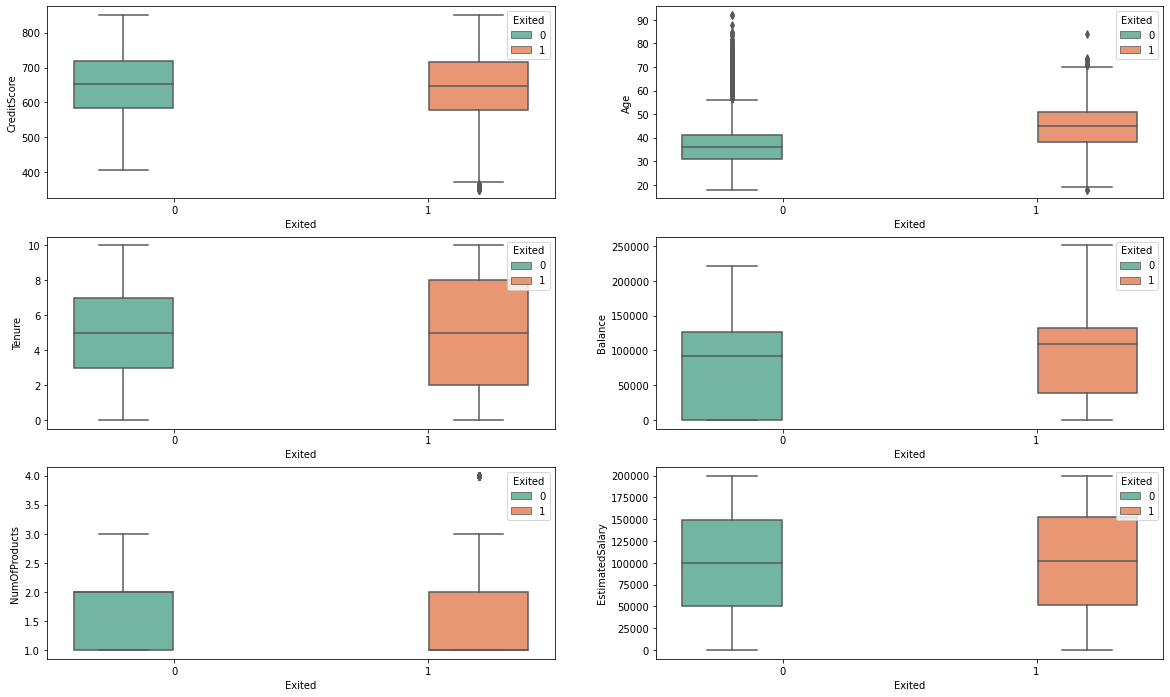

In [11]:
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
palette = 'Set2'
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df, ax=axarr[0][0], palette=palette)
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df , ax=axarr[0][1], palette=palette)
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][0], palette=palette)
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][1], palette=palette)
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][0], palette=palette)
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][1], palette=palette)

Observando os boxplots acima, podemos inferir que:

* Não há uma diferença expressiva entre os scores de crédito dos clientes que permaneceram em relação aos clientes que evadiram;

* Os clientes mais velhos estão evadindo em maior quantidade, em relação aos mais jovens, aludindo a uma certa diferença na preferência de atendimento. Vale a atenção da instituição na adoção de uma estratégia de retenção visando essa questão das idades, ou até mesmo a revisão de seu mercado-alvo;

* Clientes que possuem pouco tempo de instituição, ou muito tempo de instituição (extremos) são mais propensos a churn do que aqueles que estão próximos a média geral de Ternure;

* Um fator preocupante é a expressiva perda de clientes com altos montantes. Isso faz com que a instituição tenha menor poderio na concessão de empréstimos;

* A quantidade de produtos, assim como o salário estimado de cada cliente, não possuem relação com a probabilidade de churn.


### 4. FEATURE ENGINEERING

Nessa etapa, vamos procurar algumas características principais que possam ter impacto significativo no aumento da probabilidade de churning. Primeiramente, vamos distribuir nosso dataset em dois conjuntos principais: um para treino e outro para teste.

In [12]:
# Separar conjunto de treino e de teste
df_treino = df.sample(frac=0.8,random_state=200)
df_teste = df.drop(df_treino.index)
print('Total de amostras do conjunto de treino: {}'.format(len(df_treino)))
print('Total de amostras do conjunto de testes: {}'.format(len(df_teste)))

Total de amostras do conjunto de treino: 8000
Total de amostras do conjunto de testes: 2000


(-1.0, 5.0)

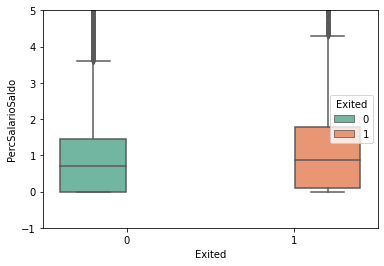

In [13]:
df_treino['PercSalarioSaldo'] = df_treino.Balance/df_treino.EstimatedSalary
sns.boxplot(y='PercSalarioSaldo',x = 'Exited', hue = 'Exited',data = df_treino, palette='Set2')
plt.ylim(-1, 5)

Podemos perceber, conforme o boxplot acima, que a relação entre saldo bancário e salário nos mostra que há um valor superior quando observamos os clientes com evasão, provando mais uma vez que tal fato é sinal de alerta para a diminuição da fonte de empréstimos da instituição bancária, diminuindo assim a sua performance.  

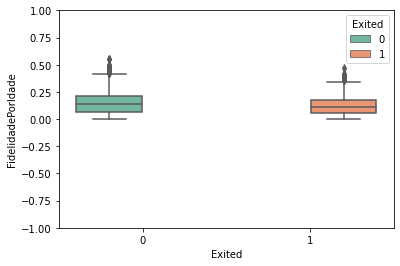

In [14]:
# Dada um determinado nível de fidelidade, buscamos colocá-lo em razão da idade dos clientes para buscar insights
df_treino['FidelidadePorIdade'] = df_treino.Tenure/(df_treino.Age)
sns.boxplot(y='FidelidadePorIdade',x = 'Exited', hue = 'Exited',data = df_treino, palette='Set2')
plt.ylim(-1, 1)
plt.show()

E por último, mas não menos importante, vamos tentar mensurar qual o impacto da pontuação de crédito conforme a variação da idade, visando a análise do comportamento de consumo por faixa etária.

In [15]:
df_treino['ScorePorIdade'] = df_treino.CreditScore/(df_treino.Age)
df_treino.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,PercSalarioSaldo,FidelidadePorIdade,ScorePorIdade
8159,461,Spain,Female,25,6,0.00,2,1,1,15306.29,0,0.000000,0.240000,18.440000
6332,619,France,Female,35,4,90413.12,1,1,1,20555.21,0,4.398550,0.114286,17.685714
8895,699,France,Female,40,8,122038.34,1,1,0,102085.35,0,1.195454,0.200000,17.475000
5351,558,Germany,Male,41,2,124227.14,1,1,1,111184.67,0,1.117305,0.048780,13.609756
4314,638,France,Male,34,5,133501.36,1,0,1,155643.04,0,0.857741,0.147059,18.764706


### 5. PREPARAÇÃO DOS DADOS PARA MODELAGEM

In [16]:
# Organizando colunas por tipos de dados, visando uma fácil manipulação.
var_continuas = ['CreditScore',  'Age', 'Tenure', 'Balance','NumOfProducts', 'EstimatedSalary', 'PercSalarioSaldo',
                 'FidelidadePorIdade','ScorePorIdade']
var_categoricas = ['HasCrCard', 'IsActiveMember','Geography', 'Gender']
df_treino = df_treino[['Exited'] + var_continuas + var_categoricas]
df_treino.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,PercSalarioSaldo,FidelidadePorIdade,ScorePorIdade,HasCrCard,IsActiveMember,Geography,Gender
8159,0,461,25,6,0.00,2,15306.29,0.000000,0.240000,18.440000,1,1,Spain,Female
6332,0,619,35,4,90413.12,1,20555.21,4.398550,0.114286,17.685714,1,1,France,Female
8895,0,699,40,8,122038.34,1,102085.35,1.195454,0.200000,17.475000,1,0,France,Female
5351,0,558,41,2,124227.14,1,111184.67,1.117305,0.048780,13.609756,1,1,Germany,Male
4314,0,638,34,5,133501.36,1,155643.04,0.857741,0.147059,18.764706,0,1,France,Male


Após a realização da separação das variáveis por *data type*, vamos focar nas variáveis binárias (*HasCrCard* e *IsActiveMember*). Com o intuito de destacar sua correlação negativa para o modelo, entre o fato de possuir cartão de crédito ou não, assim como se o cliente é membro ativo ou não, vamos substituir o 0 por -1.

In [17]:
df_treino.loc[df_treino.HasCrCard == 0, 'HasCrCard'] = -1
df_treino.loc[df_treino.IsActiveMember == 0, 'IsActiveMember'] = -1
df_treino.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,PercSalarioSaldo,FidelidadePorIdade,ScorePorIdade,HasCrCard,IsActiveMember,Geography,Gender
8159,0,461,25,6,0.00,2,15306.29,0.000000,0.240000,18.440000,1,1,Spain,Female
6332,0,619,35,4,90413.12,1,20555.21,4.398550,0.114286,17.685714,1,1,France,Female
8895,0,699,40,8,122038.34,1,102085.35,1.195454,0.200000,17.475000,1,-1,France,Female
5351,0,558,41,2,124227.14,1,111184.67,1.117305,0.048780,13.609756,1,1,Germany,Male
4314,0,638,34,5,133501.36,1,155643.04,0.857741,0.147059,18.764706,-1,1,France,Male


In [18]:
lista = ['Geography', 'Gender']
remover = list()
for i in lista:
    if (df_treino[i].dtype == np.str_ or df_treino[i].dtype == np.object_):
        for j in df_treino[i].unique():
            df_treino[i+'_'+j] = np.where(df_treino[i] == j,1,-1)
        remover.append(i)
df_treino = df_treino.drop(remover, axis=1)
df_treino.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,PercSalarioSaldo,FidelidadePorIdade,ScorePorIdade,HasCrCard,IsActiveMember,Geography_Spain,Geography_France,Geography_Germany,Gender_Female,Gender_Male
8159,0,461,25,6,0.00,2,15306.29,0.000000,0.240000,18.440000,1,1,1,-1,-1,1,-1
6332,0,619,35,4,90413.12,1,20555.21,4.398550,0.114286,17.685714,1,1,-1,1,-1,1,-1
8895,0,699,40,8,122038.34,1,102085.35,1.195454,0.200000,17.475000,1,-1,-1,1,-1,1,-1
5351,0,558,41,2,124227.14,1,111184.67,1.117305,0.048780,13.609756,1,1,-1,-1,1,-1,1
4314,0,638,34,5,133501.36,1,155643.04,0.857741,0.147059,18.764706,-1,1,-1,1,-1,-1,1


In [19]:
# Aplicação do minMax scaling para as variáveis contínuas
minV = df_treino[var_continuas].min().copy()
maxV = df_treino[var_continuas].max().copy()
df_treino[var_continuas] = (df_treino[var_continuas]-minV)/(maxV-minV)
df_treino.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,PercSalarioSaldo,FidelidadePorIdade,ScorePorIdade,HasCrCard,IsActiveMember,Geography_Spain,Geography_France,Geography_Germany,Gender_Female,Gender_Male
8159,0,0.222,0.094595,0.6,0.000000,0.333333,0.076118,0.000000,0.432000,0.323157,1,1,1,-1,-1,1,-1
6332,0,0.538,0.229730,0.4,0.360358,0.000000,0.102376,0.003317,0.205714,0.305211,1,1,-1,1,-1,1,-1
8895,0,0.698,0.297297,0.8,0.486406,0.000000,0.510225,0.000901,0.360000,0.300198,1,-1,-1,1,-1,1,-1
5351,0,0.416,0.310811,0.2,0.495130,0.000000,0.555744,0.000843,0.087805,0.208238,1,1,-1,-1,1,-1,1
4314,0,0.576,0.216216,0.5,0.532094,0.000000,0.778145,0.000647,0.264706,0.330882,-1,1,-1,1,-1,-1,1


In [20]:
# Preparação do pipeline para a etapa de modelagem
def Preparar_Fluxo_Dados (df_predicao,df_treino_Col,minV,maxV):
    # Adicionando os novos atributos
    df_predicao['PercSalarioSaldo'] = df_predicao.Balance/df_predicao.EstimatedSalary
    df_predicao['FidelidadePorIdade'] = df_predicao.Tenure/(df_predicao.Age - 18)
    df_predicao['ScorePorIdade'] = df_predicao.CreditScore/(df_predicao.Age - 18)
    # Reordenando as colunas
    var_continuas = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary','PercSalarioSaldo',
                   'FidelidadePorIdade','ScorePorIdade']
    var_categoricas = ['HasCrCard','IsActiveMember','Geography', 'Gender'] 
    df_predicao = df_predicao[['Exited'] + var_continuas + var_categoricas]
    # Troca o 0 por -1 nas variáveis categóricas
    df_predicao.loc[df_predicao.HasCrCard == 0, 'HasCrCard'] = -1
    df_predicao.loc[df_predicao.IsActiveMember == 0, 'IsActiveMember'] = -1
    # One hot encode para as 2 variáveis categóricas
    lista = ["Geography", "Gender"]
    remover = list()
    for i in lista:
        for j in df_predicao[i].unique():
            df_predicao[i+'_'+j] = np.where(df_predicao[i] == j,1,-1)
        remover.append(i)
    df_predicao = df_predicao.drop(remover, axis=1)
    # Garantindo que todas as variáveis hot encoded que aparecem no treino, aparecerão posteriormente.
    L = list(set(df_treino_Col) - set(df_predicao.columns))
    for l in L:
        df_predicao[str(l)] = -1        
    # MinMax scaling das variáveis contínuas baseadas nos dados de treino
    df_predicao[var_continuas] = (df_predicao[var_continuas]-minV)/(maxV-minV)
    # Ensure that The variables are ordered in the same way as was ordered in the train set
    df_predicao = df_predicao[df_treino_Col]
    return df_predicao

### 6. AJUSTE DE MODELOS E SELEÇÃO 

Com o objetivo de ajustarmos nosso modelo ao máximo, buscando prever o comportamento dos dados, vamos tentar as seguintes técnicas:

* Regressão logística com diferentes kernels;
* SVM com diferentes kernels;
* Modelos ensemble (Random Forests e XGBooster).

In [21]:
# Funções de apoio
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform

In [22]:
# Funções para ajustar os modelos 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [23]:
# Funções para a determinação do score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [24]:
# Função para passar o melhor modelo e seu score, assim como seus respectivos parâmetros
def melhor_modelo(model):
    print(model.best_score_)    
    print(model.best_params_)
    print(model.best_estimator_)
def passar_auc_scores(y_actual, method,method2):
    auc_score = roc_auc_score(y_actual, method); 
    fpr_df, tpr_df, _ = roc_curve(y_actual, method2); 
    return (auc_score, fpr_df, tpr_df)

In [25]:
# Ajustar regressão logística
param_grid = {'C': [0.1,0.5,1,10,50,100], 'max_iter': [250], 'fit_intercept':[True],'intercept_scaling':[1],
              'penalty':['l2'], 'tol':[0.00001,0.0001,0.000001]}
log_primal_Grid = GridSearchCV(LogisticRegression(solver='lbfgs'),param_grid, cv=10, refit=True, verbose=0)
log_primal_Grid.fit(df_treino.loc[:, df_treino.columns != 'Exited'],df_treino.Exited)
melhor_modelo(log_primal_Grid)

0.8149999999999998
{'C': 100, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 250, 'penalty': 'l2', 'tol': 1e-05}
LogisticRegression(C=100, max_iter=250, tol=1e-05)


In [26]:
# Regressão logística - kernel com polinômio de segundo grau
param_grid = {'C': [0.1,10,50], 'max_iter': [300,500], 'fit_intercept':[True],'intercept_scaling':[1],'penalty':['l2'],
              'tol':[0.0001,0.000001]}
polinomio2 = PolynomialFeatures(degree=2)
df_treino_pol2 = polinomio2.fit_transform(df_treino.loc[:, df_treino.columns != 'Exited'])
log_pol2_Grid = GridSearchCV(LogisticRegression(solver = 'liblinear'),param_grid, cv=5, refit=True, verbose=0)
log_pol2_Grid.fit(df_treino_pol2,df_treino.Exited)
melhor_modelo(log_pol2_Grid)

0.8553750000000001
{'C': 50, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 300, 'penalty': 'l2', 'tol': 0.0001}
LogisticRegression(C=50, max_iter=300, solver='liblinear')


In [27]:
# SVM com kernel 'rbf'
param_grid = {'C': [0.5,100,150], 'gamma': [0.1,0.01,0.001],'probability':[True],'kernel': ['rbf']}
SVM_Grid = GridSearchCV(SVC(), param_grid, cv=3, refit=True, verbose=0)
SVM_Grid.fit(df_treino.loc[:, df_treino.columns != 'Exited'],df_treino.Exited)
melhor_modelo(SVM_Grid)

0.8518747609662071
{'C': 100, 'gamma': 0.1, 'kernel': 'rbf', 'probability': True}
SVC(C=100, gamma=0.1, probability=True)


In [28]:
# SVM com kernel 'poly'
param_grid = {'C': [0.5,1,10,50,100], 'gamma': [0.1,0.01,0.001],'probability':[True],'kernel': ['poly'],'degree':[2,3] }
SVM_grid = GridSearchCV(SVC(), param_grid, cv=3, refit=True, verbose=0)
SVM_grid.fit(df_treino.loc[:, df_treino.columns != 'Exited'],df_treino.Exited)
melhor_modelo(SVM_grid)

0.8544999485716948
{'C': 100, 'degree': 2, 'gamma': 0.1, 'kernel': 'poly', 'probability': True}
SVC(C=100, degree=2, gamma=0.1, kernel='poly', probability=True)


In [29]:
# Random Forest
param_grid = {'max_depth': [3, 5, 6, 7, 8], 'max_features': [2,4,6,7,8,9],'n_estimators':[50,100],'min_samples_split': [3, 5, 6, 7]}
RanFor_grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, refit=True, verbose=0)
RanFor_grid.fit(df_treino.loc[:, df_treino.columns != 'Exited'],df_treino.Exited)
melhor_modelo(RanFor_grid)

0.8632500000000001
{'max_depth': 8, 'max_features': 6, 'min_samples_split': 7, 'n_estimators': 50}
RandomForestClassifier(max_depth=8, max_features=6, min_samples_split=7,
                       n_estimators=50)


In [31]:
# XGBoosting 
param_grid = {'max_depth': [5,6,7,8], 'gamma': [0.01,0.001,0.001],'min_child_weight':[1,5,10], 'learning_rate': [0.05,0.1, 0.2, 0.3], 'n_estimators':[5,10,20,100]}
xgb_grid = GridSearchCV(XGBClassifier(), param_grid, cv=5, refit=True, verbose=0)
xgb_grid.fit(df_treino.loc[:, df_treino.columns != 'Exited'],df_treino.Exited)
melhor_modelo(xgb_grid)

0.8629999999999999
{'gamma': 0.001, 'learning_rate': 0.2, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 5}
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.001, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.2, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=7, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=5, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


##### 6.1. MELHORES PARÂMETROS DE CADA ALGORITMO

In [32]:
# Regressão Logística
log_primal = LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,intercept_scaling=1, max_iter=250,n_jobs=None, 
                                penalty='l2', random_state=None, solver='lbfgs',tol=1e-05, verbose=0, warm_start=False)
log_primal.fit(df_treino.loc[:, df_treino.columns != 'Exited'],df_treino.Exited)

LogisticRegression(C=100, max_iter=250, tol=1e-05)

In [33]:
# Regressão Logística com kernel e polinômio de grau 2
poly2 = PolynomialFeatures(degree=2)
df_treino_pol2 = poly2.fit_transform(df_treino.loc[:, df_treino.columns != 'Exited'])
log_pol2 = LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,intercept_scaling=1, max_iter=300, n_jobs=None, 
                              penalty='l2', random_state=None, solver='liblinear',tol=0.0001, verbose=0, warm_start=False)
log_pol2.fit(df_treino_pol2,df_treino.Exited)

LogisticRegression(C=10, max_iter=300, solver='liblinear')

In [34]:
# SVM com kernel 'rbf'
SVM_RBF = SVC(C=100, cache_size=200, class_weight=None, coef0=0.0, decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf', max_iter=-1, probability=True, 
              random_state=None, shrinking=True,tol=0.001, verbose=False)
SVM_RBF.fit(df_treino.loc[:, df_treino.columns != 'Exited'],df_treino.Exited)

SVC(C=100, gamma=0.1, probability=True)

In [36]:
# SVM com kernel 'poly'
SVM_POL = SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,  decision_function_shape='ovr', degree=2, gamma=0.1, kernel='poly',  max_iter=-1,
              probability=True, random_state=None, shrinking=True, tol=0.001, verbose=False)
SVM_POL.fit(df_treino.loc[:, df_treino.columns != 'Exited'],df_treino.Exited)

SVC(C=100, degree=2, gamma=0.1, kernel='poly', probability=True)

In [37]:
# Random Forest
RF = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',max_depth=8, max_features=6, max_leaf_nodes=None,min_impurity_decrease=0.0,
                            min_impurity_split=None,min_samples_leaf=1, min_samples_split=3,min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
                            oob_score=False, random_state=None, verbose=0,warm_start=False)
RF.fit(df_treino.loc[:, df_treino.columns != 'Exited'],df_treino.Exited)

RandomForestClassifier(max_depth=8, max_features=6, min_samples_split=3,
                       n_estimators=50)

In [38]:
# XGBooster
XGB = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,colsample_bytree=1, gamma=0.01, learning_rate=0.1, max_delta_step=0,max_depth=7,
                    min_child_weight=5, n_estimators=20,n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,reg_alpha=0, 
                    reg_lambda=1, scale_pos_weight=1, seed=None, subsample=1)
XGB.fit(df_treino.loc[:, df_treino.columns != 'Exited'],df_treino.Exited)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.01, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=7, max_leaves=0, min_child_weight=5,
              missing=nan, monotone_constraints='()', n_estimators=20, n_jobs=1,
              nthread=1, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, ...)

##### 6.2. PRECISÃO DO MELHOR AJUSTE DO MODELO

Após a análise dos modelos de previsão, vamos dar uma olhada na precisão dos mesmos. Como um dos objetivos deste estudo é a análise dos clientes que saem do banco, vamos focar na precisão dos *Churns*.

In [39]:
print(classification_report(df_treino.Exited, log_primal.predict(df_treino.loc[:, df_treino.columns != 'Exited'])))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89      6353
           1       0.64      0.24      0.35      1647

    accuracy                           0.82      8000
   macro avg       0.73      0.60      0.62      8000
weighted avg       0.79      0.82      0.78      8000



In [40]:
print(classification_report(df_treino.Exited, log_pol2.predict(df_treino_pol2)))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      6353
           1       0.77      0.46      0.57      1647

    accuracy                           0.86      8000
   macro avg       0.82      0.71      0.75      8000
weighted avg       0.85      0.86      0.85      8000



In [41]:
print(classification_report(df_treino.Exited, SVM_RBF.predict(df_treino.loc[:, df_treino.columns != 'Exited'])))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      6353
           1       0.85      0.40      0.54      1647

    accuracy                           0.86      8000
   macro avg       0.86      0.69      0.73      8000
weighted avg       0.86      0.86      0.84      8000



In [42]:
print(classification_report(df_treino.Exited, SVM_POL.predict(df_treino.loc[:, df_treino.columns != 'Exited'])))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      6353
           1       0.84      0.38      0.52      1647

    accuracy                           0.86      8000
   macro avg       0.85      0.68      0.72      8000
weighted avg       0.85      0.86      0.83      8000



In [43]:
print(classification_report(df_treino.Exited,  RF.predict(df_treino.loc[:, df_treino.columns != 'Exited'])))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      6353
           1       0.88      0.52      0.66      1647

    accuracy                           0.89      8000
   macro avg       0.89      0.75      0.79      8000
weighted avg       0.89      0.89      0.88      8000



In [44]:
print(classification_report(df_treino.Exited,  XGB.predict(df_treino.loc[:, df_treino.columns != 'Exited'])))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93      6353
           1       0.83      0.53      0.64      1647

    accuracy                           0.88      8000
   macro avg       0.86      0.75      0.79      8000
weighted avg       0.88      0.88      0.87      8000



In [45]:
y = df_treino.Exited
X = df_treino.loc[:, df_treino.columns != 'Exited']
X_pol2 = df_treino_pol2
auc_log_primal, fpr_log_primal, tpr_log_primal = passar_auc_scores(y, log_primal.predict(X),log_primal.predict_proba(X)[:,1])
auc_log_pol2, fpr_log_pol2, tpr_log_pol2 = passar_auc_scores(y, log_pol2.predict(X_pol2),log_pol2.predict_proba(X_pol2)[:,1])
auc_SVM_RBF, fpr_SVM_RBF, tpr_SVM_RBF = passar_auc_scores(y, SVM_RBF.predict(X),SVM_RBF.predict_proba(X)[:,1])
auc_SVM_POL, fpr_SVM_POL, tpr_SVM_POL = passar_auc_scores(y, SVM_POL.predict(X),SVM_POL.predict_proba(X)[:,1])
auc_RF, fpr_RF, tpr_RF = passar_auc_scores(y, RF.predict(X),RF.predict_proba(X)[:,1])
auc_XGB, fpr_XGB, tpr_XGB = passar_auc_scores(y, XGB.predict(X),XGB.predict_proba(X)[:,1])

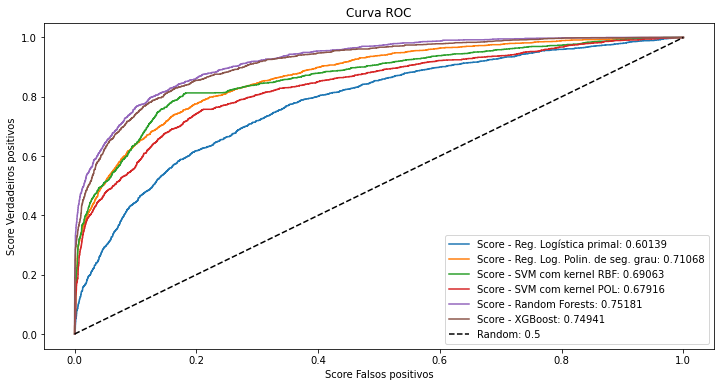

In [46]:
plt.figure(figsize = (12,6), linewidth= 1)
plt.plot(fpr_log_primal, tpr_log_primal, label = 'Score - Reg. Logística primal: ' + str(round(auc_log_primal, 5)))
plt.plot(fpr_log_pol2, tpr_log_pol2, label = 'Score - Reg. Log. Polin. de seg. grau: ' + str(round(auc_log_pol2, 5)))
plt.plot(fpr_SVM_RBF, tpr_SVM_RBF, label = 'Score - SVM com kernel RBF: ' + str(round(auc_SVM_RBF, 5)))
plt.plot(fpr_SVM_POL, tpr_SVM_POL, label = 'Score - SVM com kernel POL: ' + str(round(auc_SVM_POL, 5)))
plt.plot(fpr_RF, tpr_RF, label = 'Score - Random Forests: ' + str(round(auc_RF, 5)))
plt.plot(fpr_XGB, tpr_XGB, label = 'Score - XGBoost: ' + str(round(auc_XGB, 5)))
plt.plot([0,1], [0,1], 'k--', label = 'Random: 0.5')
plt.xlabel('Score Falsos positivos')
plt.ylabel('Score Verdadeiros positivos')
plt.title('Curva ROC')
plt.legend(loc='best')
plt.show()


Visto que o principal objetivo desse trabalho é prever o rol de clientes que irá evadir, para assim trabalhar em uma estratégia de retenção dos mesmos, podemos considerar as medidas de recall de '1' (churns), tão importantes quanto a precisão obtida para o mesmo grupo. 

Sendo que temos um churn de aproximadamente 20%, qualquer score de recall acima dessa base já nos indicaria uma evolução com a utilização do modelo selecionado. No entanto, vamos buscar, concomitantemente ao recall, a maior precisão possível, uma vez que também queremos que nosso modelo direcione os recursos disponíveis para o processamento do objetivo do modelo, e não dos falsos positivos.

De todos os modelos testados acima, o que mais se encaixa nos nossos parâmetros de busca é o método *Random Forests*, que obteve uma precisão de 88%, aliada a uma recall de 52% para o número '1', ou seja, de todos os clientes que o modelo de Random Forests aponta como possível *Churn*, 88% de fato acabam deixando a instituição bancária. Já os 52% de recall nos dizem que o modelo consegue destacar cerca de 53% de todos aqueles que evadiram.  

In [47]:
# Fazendo a transformação para os dados de teste
df_teste = Preparar_Fluxo_Dados(df_teste,df_treino.columns,minV,maxV)
df_teste = df_teste.mask(np.isinf(df_teste))
df_teste = df_teste.dropna()
df_teste.shape

(1996, 17)

In [48]:
print(classification_report(df_teste.Exited,  RF.predict(df_teste.loc[:, df_teste.columns != 'Exited'])))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1607
           1       0.76      0.41      0.54       389

    accuracy                           0.86      1996
   macro avg       0.82      0.69      0.73      1996
weighted avg       0.85      0.86      0.84      1996



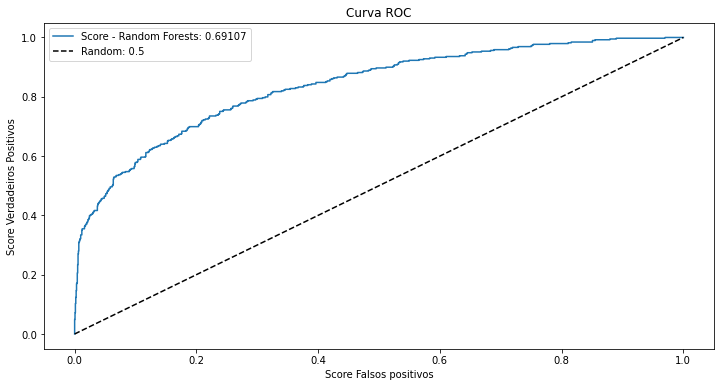

In [49]:
auc_RF_teste, fpr_RF_teste, tpr_RF_teste = passar_auc_scores(df_teste.Exited, RF.predict(df_teste.loc[:, df_teste.columns != 'Exited']),
                                                       RF.predict_proba(df_teste.loc[:, df_teste.columns != 'Exited'])[:,1])
plt.figure(figsize = (12,6), linewidth= 1)
plt.plot(fpr_RF_teste, tpr_RF_teste, label = 'Score - Random Forests: ' + str(round(auc_RF_teste, 5)))
plt.plot([0,1], [0,1], 'k--', label = 'Random: 0.5')
plt.xlabel('Score Falsos positivos')
plt.ylabel('Score Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc='best')
plt.show()

### 7. CONCLUSÃO

Depois de fazermos a análise da aplicação do método Random Forests nos dados de teste, podemos perceber que a precisão obtida foi um pouco menor quando comparamos a sua palicação no modelo de treino (76% de precisão com um recall de 41%). Sendo assim, percebe-se que, por mais que o modelo tenha uma alta precisão, ainda deixa escapar uma boa quantidade de churns. No entanto, mesmo com as dificuldades encontradas, conseguimos entender quais variáveis influenciam para o churn por meio da análise exploratória, assim como detectamos que o modelo Random Forests é o mais eficaz para a predição das evasões, ou seja, conseguimos responder nosso problema de pesquisa.  

Uma sugestão para corrigirmos essa questão poderia ser o retreinamento do modelo com uma maior quantidade de dados ao longo do tempo. Enquanto isso, poderíamos ir utilizando o modelo gerado, e assim já irmos traçando um plano de retenção para os churns detectados.  